## Heba Allah Emad

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## EDA

In [2]:
df_market=pd.read_csv('NSE-TATAGLOBAL.csv')
df_market.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
df_market['Date'] = pd.to_datetime(df_market['Date'])
df_market.set_index('Date', inplace=True)


In [5]:
df_market=df_market.sort_values('Date')

In [6]:
df_market.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df_market.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
df_market.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
df_market.duplicated().sum()

0

conclousin data is cleaning it hasn't null values or dublicated values

In [10]:
import pandas_profiling


C:\Users\HEBAAL~1\AppData\Local\Temp/ipykernel_18696/3886088315.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [11]:
pandas_profiling.ProfileReport(df_market)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

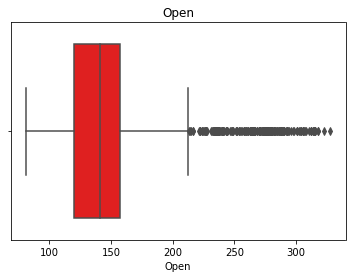

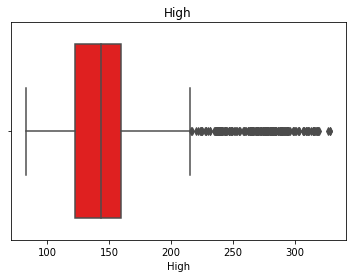

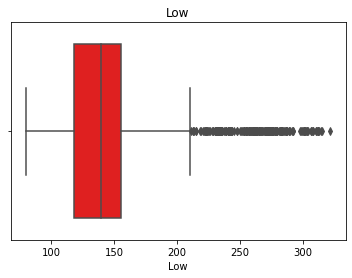

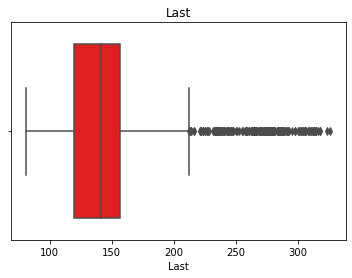

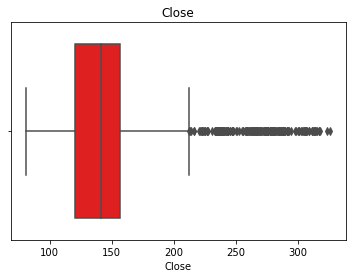

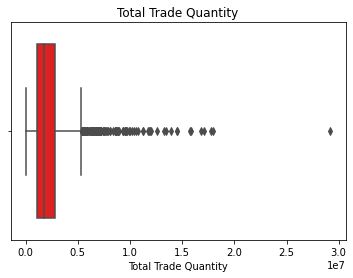

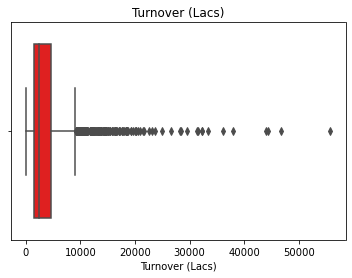

In [12]:
#showing outliers in a separte visualization

cols=['Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']
for col in cols:
    sns.boxplot(x=df_market[col],color='red')
    plt.title(col)
    plt.show()
    


There is some outliers so i will use skew method to see if it seem normal put there exist alot of extreme values

In [13]:
#Skewness is a measure of the asymmetry of a distribution
skewness = df_market.skew()
print(skewness)

Open                    1.583874
High                    1.586415
Low                     1.573542
Last                    1.584814
Close                   1.583224
Total Trade Quantity    3.644369
Turnover (Lacs)         4.058234
dtype: float64


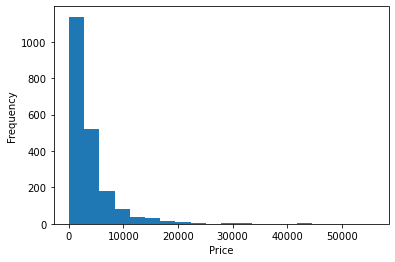

Apply log transformation


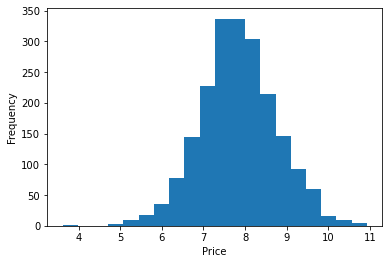

Apply Box-Cox transformation


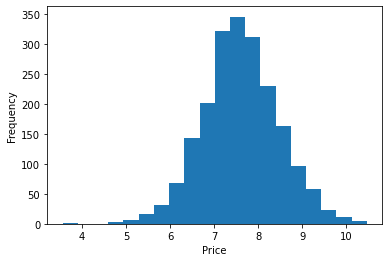

Apply Square root transformation


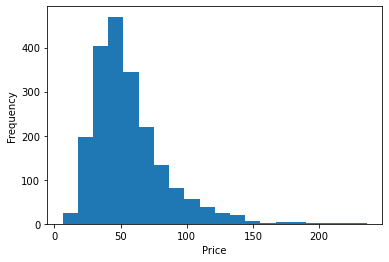

Skewness of original data: 4.058234069451285
Skewness of log transformed data: 0.024972016605762714
Skewness of Box-Cox transformed data: -0.0008662559096423396
Skewness of Square root transformed data: 1.6546270134102787


In [14]:

plt.hist(df_market['Turnover (Lacs)'],bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print('Apply log transformation') 
log_price = np.log(df_market['Turnover (Lacs)'])
plt.hist(log_price, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print('Apply Box-Cox transformation')
boxcox_price, lam = stats.boxcox(df_market['Turnover (Lacs)'])
plt.hist(boxcox_price, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print('Apply Square root transformation')
Price_sqrt = np.sqrt(df_market['Turnover (Lacs)'])
plt.hist(Price_sqrt, bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
print(f"Skewness of original data: {df_market['Turnover (Lacs)'].skew()}")
print(f"Skewness of log transformed data: {log_price.skew()}")
print(f"Skewness of Box-Cox transformed data: {stats.skew(boxcox_price)}")
print(f"Skewness of Square root transformed data: {stats.skew(Price_sqrt)}")

In [15]:
df_market['Turnover'], lam = stats.boxcox(df_market['Turnover (Lacs)'])
df_market

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Turnover
Date,,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56,6.512834
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17,5.736477
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,5.695696
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,6.484639
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,6.375166
...,...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,8.670969
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,8.322516
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,8.278181


In [16]:
df_market = df_market.rename(columns={'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Last': 'Close', 'Close': 'Adj Close', 'Total Trade Quantity': 'Volume'})


C:\Users\HebaAllahEmadEsmailM\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


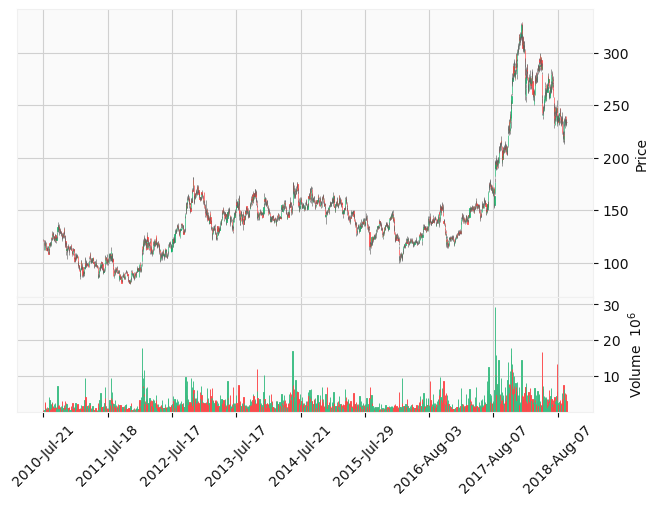

In [17]:
# Create a candlestick chart
import mplfinance as mpf
mpf.plot(df_market, type='candle', style='yahoo', volume=True)

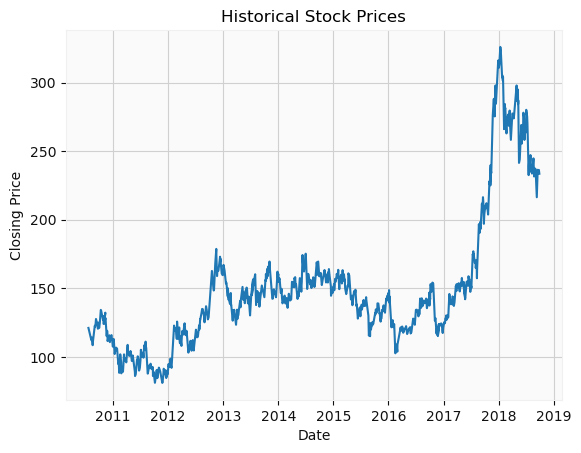

In [18]:
plt.plot(df_market['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Prices')
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
close_price = df_market['Adj Close'].values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

In [20]:
import math
train_data_len = math.ceil(len(df_market) * 0.8)
test_data_len = len(df_market) - train_data_len

In [21]:
train_data = scaled_close[0:train_data_len,:]

x_train = []
y_train = []

window_size = 80

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
test_data = scaled_close[train_data_len - window_size: , : ]
x_test = []
y_test = scaled_close[train_data_len:, :]

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
44/44 [==============================] - 22s 256ms/step - loss: 0.0030 - val_loss: 5.9485e-04
Epoch 2/10
44/44 [==============================] - 8s 176ms/step - loss: 5.2017e-04 - val_loss: 4.9931e-04
Epoch 3/10
44/44 [==============================] - 8s 184ms/step - loss: 4.7637e-04 - val_loss: 5.0072e-04
Epoch 4/10
44/44 [==============================] - 8s 190ms/step - loss: 4.6718e-04 - val_loss: 4.0539e-04
Epoch 5/10
44/44 [==============================] - 8s 184ms/step - loss: 4.0819e-04 - val_loss: 3.6190e-04
Epoch 6/10
44/44 [==============================] - 8s 185ms/step - loss: 4.4751e-04 - val_loss: 7.1743e-04
Epoch 7/10
44/44 [==============================] - 8s 184ms/step - loss: 4.3923e-04 - val_loss: 3.2228e-04
Epoch 8/10
44/44 [==============================] - 8s 181ms/step - loss: 3.3583e-04 - val_loss: 2.6162e-04
Epoch 9/10
44/44 [==============================] - 8s 182ms/step - loss: 3.1684e-04 - val_loss: 2.4982e-04
Epoch 10/10
44/44 [============

In [26]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)


13/13 [==============================] - 1s 73ms/step


In [27]:
train_mse = np.mean(np.square(train_preds - y_train))
test_mse = np.mean(np.square(test_preds - y_test))
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)

Train MSE: 0.01692117534297007
Test MSE: 0.000928960809888865


In [28]:
predictions = scaler.inverse_transform(test_preds)


In [29]:
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

C:\Users\HEBAAL~1\AppData\Local\Temp/ipykernel_14164/2490877783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


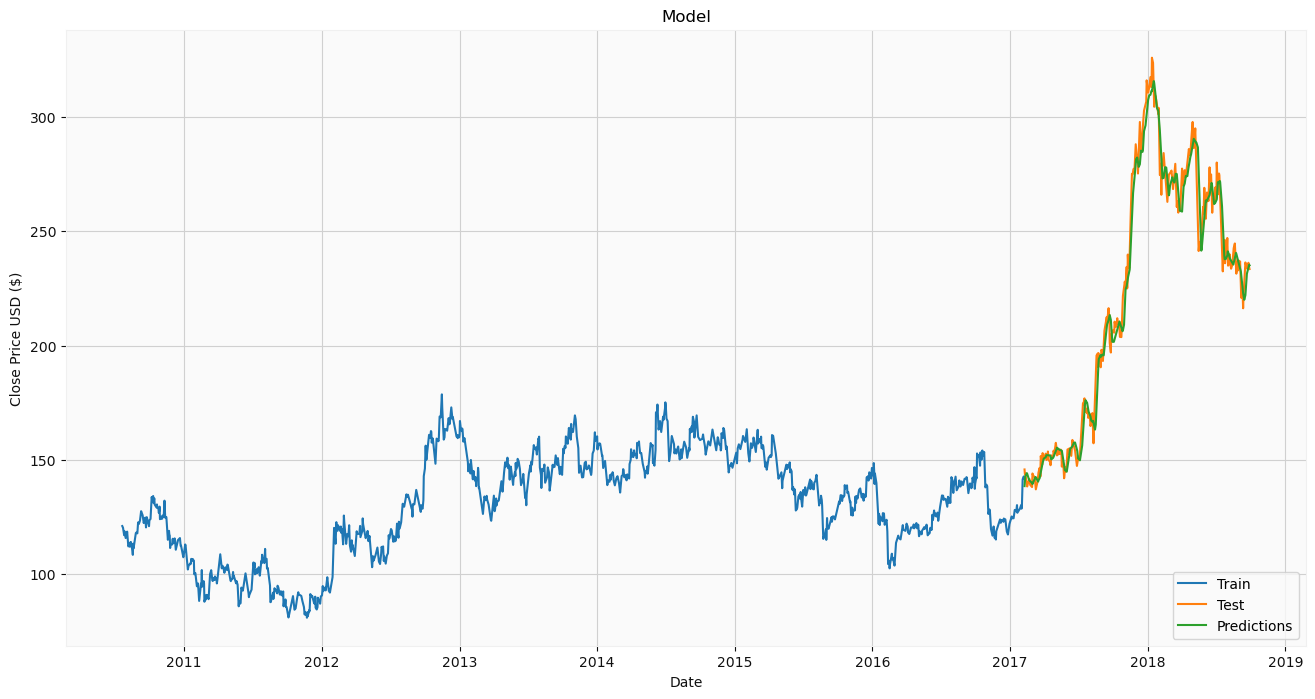

In [30]:
train = df_market[:train_data_len]
validation = df_market[train_data_len:]
validation['Predictions'] = predictions


plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()